In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [71]:
housing = pd.read_csv("/Users/chensihan/Desktop/biostat/625/house_prices.csv", keep_default_na=False)#, na_values='null')
housing_copy = housing
print(housing.shape)

(187531, 21)


In [72]:
#carpet area
housing['Carpet Area'] = housing['Carpet Area'].str.replace('sqft', '').str.strip()  # Remove 'sqft' and strip whitespace
housing['Carpet Area'] = pd.to_numeric(housing['Carpet Area'], errors='coerce')
housing['Carpet Area']

0          500.0
1          473.0
2          779.0
3          530.0
4          635.0
           ...  
187526       NaN
187527       NaN
187528    1250.0
187529       NaN
187530       NaN
Name: Carpet Area, Length: 187531, dtype: float64

# Price (in rupees)

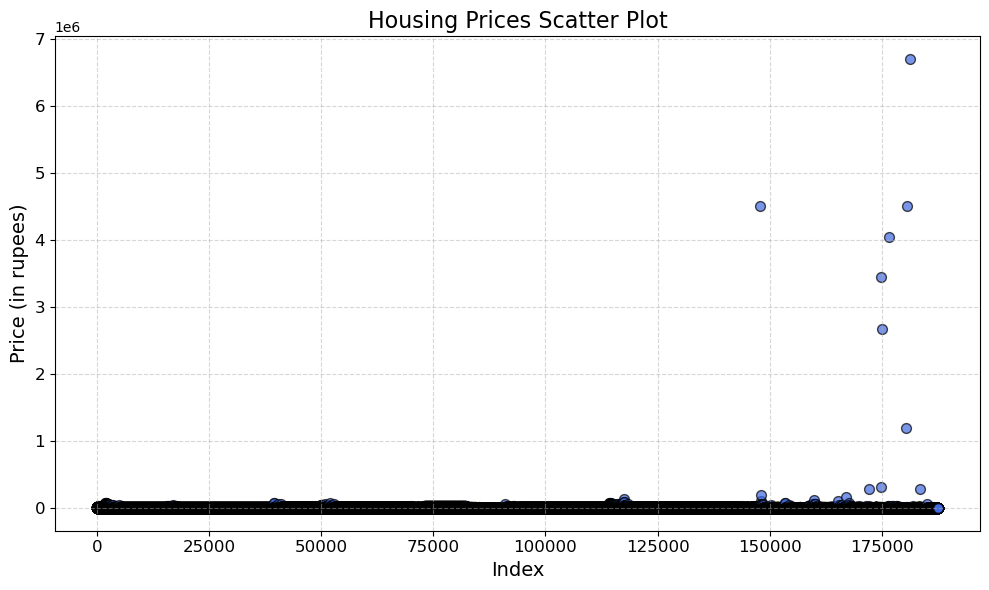

In [73]:
#plot Price (in rupees)
housing["Price (in rupees)"] = pd.to_numeric(housing["Price (in rupees)"], errors='coerce')

# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing.index, housing["Price (in rupees)"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("Housing Prices Scatter Plot", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price (in rupees)", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

In [74]:
# Identify indices of rows with missing values in "Price (in rupees)"
na_indices = housing[housing["Price (in rupees)"].isna()].index
print(len(na_indices.tolist()))
print("Indices with NA in 'Price (in rupees)':", na_indices.tolist())

17665
Indices with NA in 'Price (in rupees)': [3, 24, 37, 44, 69, 70, 71, 83, 84, 94, 103, 104, 107, 131, 168, 177, 201, 206, 224, 235, 250, 256, 265, 288, 297, 318, 346, 349, 364, 372, 378, 381, 397, 411, 463, 467, 474, 490, 499, 509, 514, 517, 523, 538, 540, 551, 566, 586, 592, 605, 612, 621, 636, 640, 652, 673, 678, 684, 709, 720, 721, 723, 724, 745, 761, 762, 765, 777, 782, 788, 795, 799, 808, 818, 826, 827, 878, 883, 899, 913, 930, 932, 938, 947, 954, 955, 963, 969, 973, 985, 1009, 1016, 1039, 1066, 1086, 1093, 1103, 1119, 1129, 1143, 1157, 1165, 1209, 1237, 1242, 1244, 1266, 1267, 1268, 1303, 1307, 1308, 1310, 1336, 1338, 1339, 1349, 1356, 1367, 1370, 1373, 1375, 1383, 1388, 1396, 1400, 1414, 1419, 1421, 1423, 1424, 1433, 1445, 1453, 1454, 1457, 1466, 1468, 1482, 1483, 1490, 1504, 1506, 1520, 1523, 1529, 1530, 1532, 1539, 1547, 1548, 1549, 1552, 1554, 1557, 1564, 1568, 1571, 1577, 1580, 1592, 1606, 1615, 1618, 1623, 1634, 1641, 1654, 1657, 1658, 1661, 1679, 1680, 1686, 1687, 1689

In [75]:
# Create a new dataset without rows where "Price (in rupees)" is NA
housing_clean = housing.dropna(subset=["Price (in rupees)"]).reset_index(drop=True)
#Select relevant features for Isolation Forest (including "Price (in rupees)")
features = ["Price (in rupees)"]
#Standardize the data
scaler = StandardScaler()
housing_clean_scaled = scaler.fit_transform(housing_clean[features])

#  Apply Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=50)
housing_clean['anomaly_score'] = isolation_forest.fit_predict(housing_clean_scaled)
outliers_indices = housing_clean[housing_clean['anomaly_score'] == -1].index

#Map outliers' indices back to the original dataset if needed
original_outliers_indices = housing_clean.loc[outliers_indices].index
print(len(original_outliers_indices.tolist()))
print("Outliers' indices (in the original dataset):", original_outliers_indices.tolist())

8494
Outliers' indices (in the original dataset): [2, 3, 11, 60, 64, 83, 114, 124, 125, 132, 133, 134, 135, 143, 144, 166, 167, 169, 174, 195, 196, 199, 206, 222, 223, 232, 241, 248, 250, 264, 266, 278, 279, 282, 304, 305, 307, 331, 337, 339, 361, 378, 383, 386, 398, 400, 407, 412, 416, 417, 429, 444, 446, 465, 466, 476, 482, 484, 487, 490, 495, 503, 507, 516, 526, 528, 529, 534, 539, 540, 542, 543, 545, 551, 553, 570, 572, 594, 603, 607, 612, 614, 621, 624, 626, 628, 629, 630, 631, 636, 638, 642, 647, 660, 668, 677, 682, 694, 699, 721, 726, 738, 741, 755, 757, 772, 777, 781, 782, 789, 815, 816, 821, 828, 829, 832, 852, 862, 882, 884, 887, 909, 910, 921, 929, 940, 956, 958, 972, 1005, 1013, 1019, 1029, 1054, 1067, 1074, 1104, 1109, 1110, 1125, 1136, 1137, 1160, 1170, 1176, 1178, 1186, 1187, 1191, 1474, 1514, 1515, 1516, 1517, 1519, 1520, 1522, 1523, 1524, 1525, 1526, 1529, 1530, 1531, 1532, 1533, 1534, 1535, 1536, 1537, 1538, 1539, 1540, 1541, 1542, 1544, 1545, 1546, 1547, 1548, 1549, 

In [76]:
ind = ~housing.index.isin(original_outliers_indices)
housing_cleaning_price=housing[ind].copy() 
print(housing_cleaning_price.shape)
housing_cleaning_price.head(5)


(179037, 21)


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500.0,Ready to Move,10 out of 11,Resale,...,,,Srushti Siddhi Mangal Murti Complex,1,2,,,,,
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473.0,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,,1 Open,Freehold,,,
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635.0,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,,1 Covered,Co-operative Society,,,
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,45 Lac,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,...,East,"Garden/Park, Main Road",Virat Aangan,1,1,,Co-operative Society,680 sqft,,
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,16.5 Lac,2538.0,thane,550.0,Ready to Move,4 out of 5,Resale,...,,,,1,,,,,,


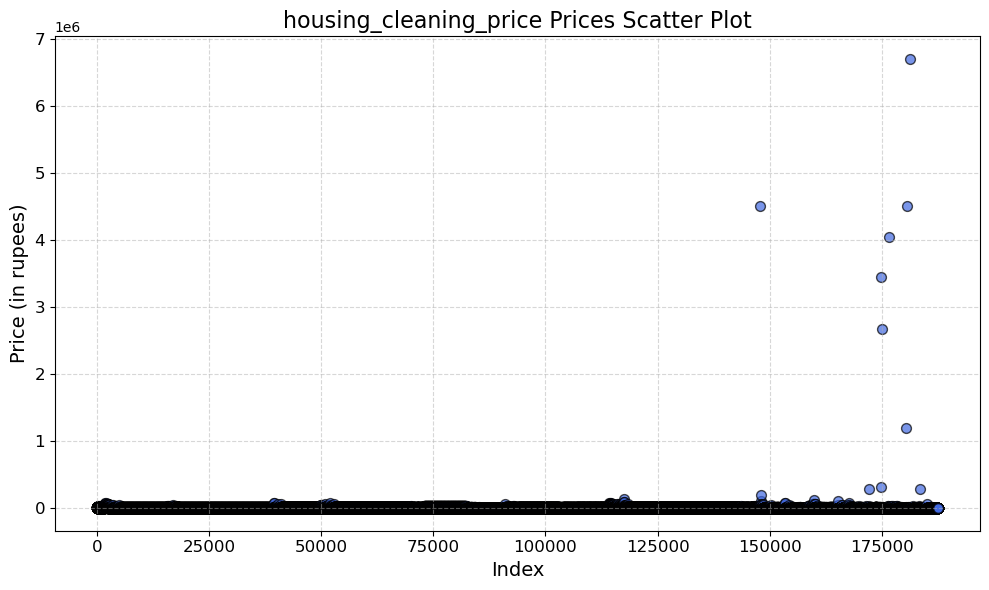

In [77]:

housing_cleaning_price["Price (in rupees)"] = pd.to_numeric(housing_cleaning_price["Price (in rupees)"], errors='coerce')

# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaning_price.index, housing_cleaning_price["Price (in rupees)"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("housing_cleaning_price Prices Scatter Plot", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price (in rupees)", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

# Carpet Area

## housing Carpet area ( original data)

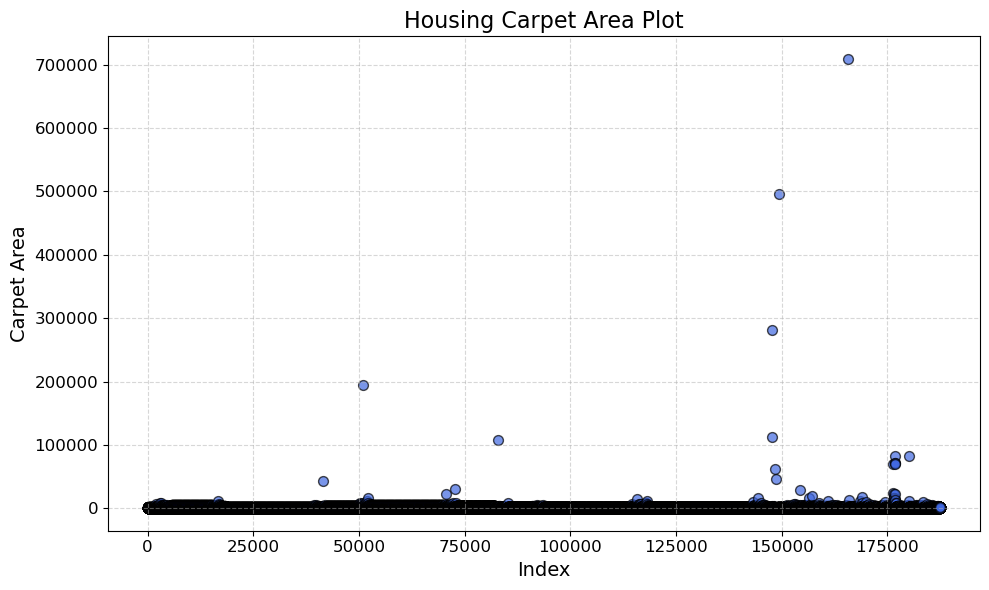

In [78]:


housing["Carpet Area"] = pd.to_numeric(housing["Carpet Area"], errors='coerce')


# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing.index, housing["Carpet Area"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("Housing Carpet Area Plot", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Carpet Area", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## housing_cleaning_price Carpet area ( only delete ouliers in price)

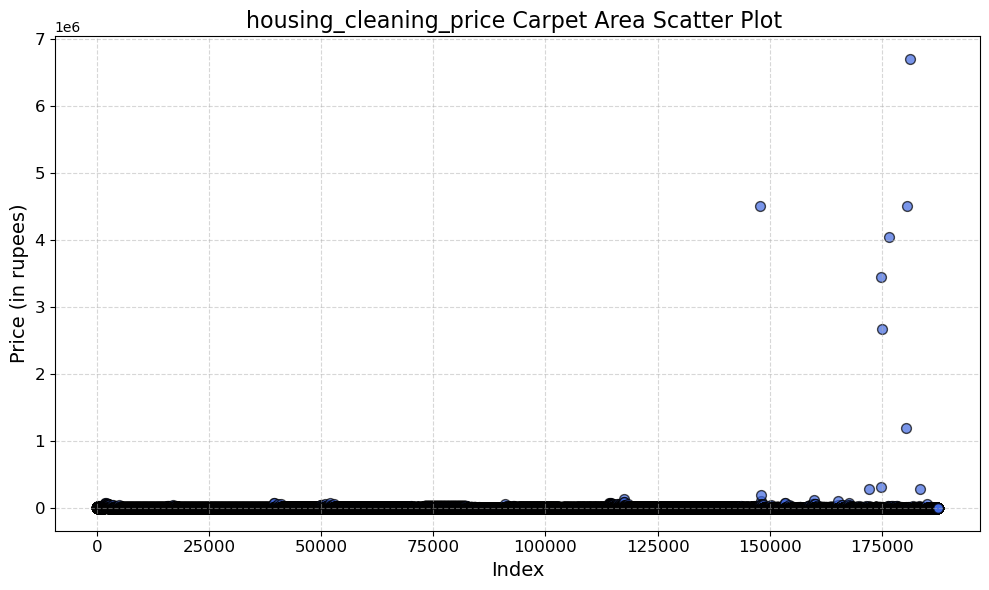

In [79]:


housing_cleaning_price["Carpet Area"] = pd.to_numeric(housing_cleaning_price["Carpet Area"], errors='coerce')

# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaning_price.index, housing_cleaning_price["Price (in rupees)"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("housing_cleaning_price Carpet Area Scatter Plot ", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Price (in rupees)", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## using Isolation Forest on carpet area

In [80]:
# Create a new dataset without rows where "Price (in rupees)" is NA
housing_cleaning_price_cleaning = housing_cleaning_price.dropna(subset=["Carpet Area"]).reset_index(drop=True)
#Select relevant features for Isolation Forest (including "Price (in rupees)")
features = ["Carpet Area"]
#Standardize the data
scaler = StandardScaler()
housing_clean_price_scaled = scaler.fit_transform(housing_cleaning_price_cleaning[features])

#  Apply Isolation Forest
isolation_forest = IsolationForest(contamination=0.05, random_state=50)
housing_cleaning_price_cleaning['anomaly_score'] = isolation_forest.fit_predict(housing_clean_price_scaled)
outliers_indices = housing_cleaning_price_cleaning[housing_cleaning_price_cleaning['anomaly_score'] == -1].index

#Map outliers' indices back to the original dataset if needed
original_outliers_indices = housing_cleaning_price_cleaning.loc[outliers_indices].index
print(len(original_outliers_indices.tolist()))
print("Outliers' indices (in the original dataset):", original_outliers_indices.tolist())

4742
Outliers' indices (in the original dataset): [14, 200, 202, 205, 463, 499, 565, 580, 631, 738, 741, 860, 871, 887, 904, 910, 936, 1019, 1033, 1075, 1078, 1114, 1116, 1119, 1136, 1139, 1141, 1166, 1181, 1182, 1196, 1197, 1201, 1221, 1226, 1246, 1253, 1258, 1279, 1306, 1313, 1335, 1345, 1346, 1350, 1365, 1368, 1387, 1404, 1420, 1422, 1439, 1444, 1452, 1453, 1456, 1468, 1469, 1478, 1504, 1507, 1510, 1517, 1524, 1526, 1527, 1529, 1537, 1556, 1557, 1568, 1569, 1575, 1576, 1587, 1588, 1606, 1623, 1628, 1643, 1671, 1673, 1678, 1691, 1699, 1725, 1726, 1740, 1744, 1754, 1758, 1772, 1798, 1839, 1863, 1864, 1887, 1892, 1893, 1903, 1907, 1939, 1955, 1963, 1965, 1993, 2032, 2040, 2165, 2167, 2181, 2207, 2211, 2220, 2239, 2264, 2303, 2306, 2326, 2336, 2338, 2360, 2370, 2379, 2381, 2398, 2455, 2456, 2467, 2487, 2534, 2547, 2554, 2569, 2577, 2585, 2593, 2601, 2609, 2617, 2625, 2633, 2641, 2649, 2657, 2665, 2673, 2681, 2689, 2697, 2705, 2713, 2721, 2729, 2737, 2745, 2753, 2761, 2769, 2777, 2785, 2

In [84]:
ind = ~housing_cleaning_price.index.isin(original_outliers_indices)
housing_cleaning_price_carpet_area=housing_cleaning_price[ind].copy() 
print(housing_cleaning_price_carpet_area.shape)
housing_cleaning_price_carpet_area.head(5)

(174459, 21)


,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,...,facing,overlooking,Society,Bathroom,Balcony,Car Parking,Ownership,Super Area,Dimensions,Plot Area
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.0,thane,500.0,Ready to Move,10 out of 11,Resale,...,,,Srushti Siddhi Mangal Murti Complex,1,2,,,,,
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.0,thane,473.0,Ready to Move,3 out of 22,Resale,...,East,Garden/Park,Dosti Vihar,2,,1 Open,Freehold,,,
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.0,thane,635.0,Ready to Move,20 out of 42,Resale,...,West,"Garden/Park, Main Road",TenX Habitat Raymond Realty,2,,1 Covered,Co-operative Society,,,
5,5,1 BHK Ready to Occupy Flat for sale in Virat A...,Creatively planned and constructed is a 1 BHK ...,45 Lac,6618.0,thane,NaN,Ready to Move,2 out of 7,Resale,...,East,"Garden/Park, Main Road",Virat Aangan,1,1,,Co-operative Society,680 sqft,,
6,6,1 BHK Ready to Occupy Flat for sale Mumbra,This magnificent 1 BHK Flat is available for s...,16.5 Lac,2538.0,thane,550.0,Ready to Move,4 out of 5,Resale,...,,,,1,,,,,,


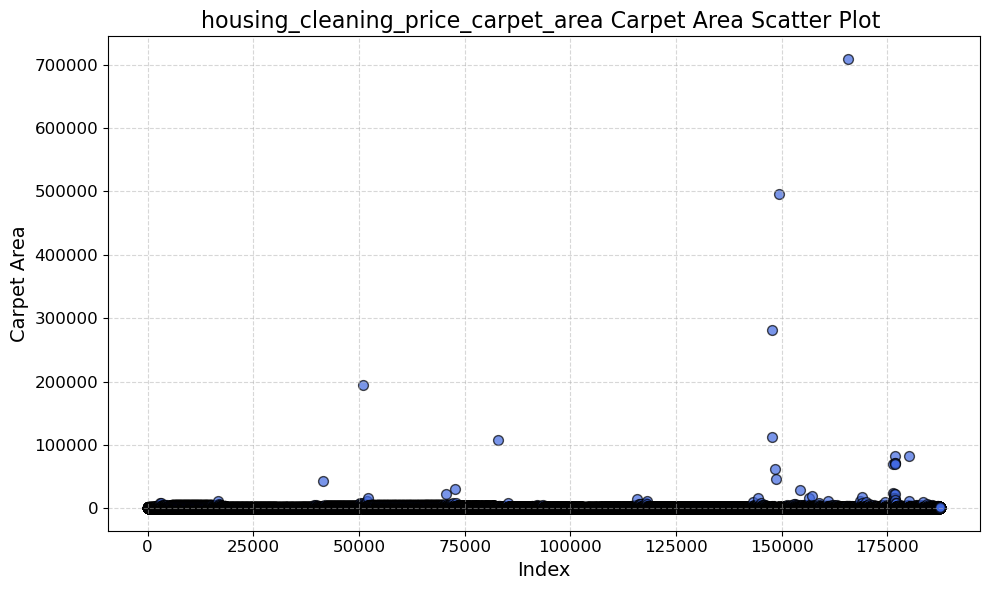

In [85]:
housing_cleaning_price_carpet_area["Carpet Area"] = pd.to_numeric(housing_cleaning_price_carpet_area["Carpet Area"], errors='coerce')

# Create the scatter plot with enhancements
plt.figure(figsize=(10, 6))
plt.scatter(housing_cleaning_price_carpet_area.index, housing_cleaning_price_carpet_area["Carpet Area"], color='royalblue', edgecolor='black', alpha=0.7, s=50)

# Add labels and title
plt.title("housing_cleaning_price_carpet_area Carpet Area Scatter Plot ", fontsize=16)
plt.xlabel("Index", fontsize=14)
plt.ylabel("Carpet Area", fontsize=14)

# Customize grid and style
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

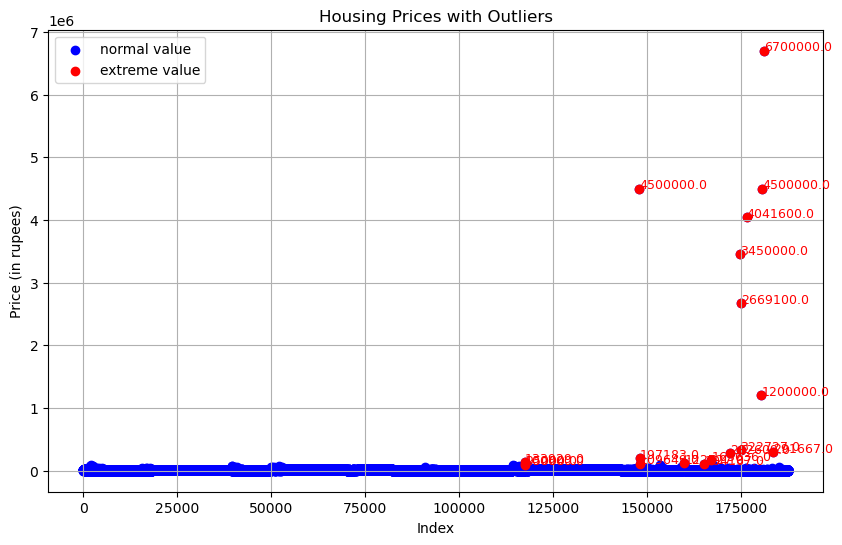

In [7]:
#outliers (using zscore to determine)
import pandas as pd
import matplotlib.pyplot as plt



mean_price = housing["Price (in rupees)"].mean()
std_price = housing["Price (in rupees)"].std()


housing['Z-score'] = (housing["Price (in rupees)"] - mean_price) / std_price


housing['Outlier'] = np.abs(housing['Z-score']) > 3
outliers = housing[housing['Outlier']]



plt.figure(figsize=(10, 6))
plt.scatter(housing.index, housing["Price (in rupees)"], color='blue', marker='o', label='normal value')
plt.scatter(outliers.index, outliers["Price (in rupees)"], color='red', marker='o', label='extreme value')

for i, row in outliers.iterrows():
    plt.text(i, row["Price (in rupees)"], f'{row["Price (in rupees)"]}', fontsize=9, color='red')

plt.title('Housing Prices with Outliers')
plt.xlabel('Index')
plt.ylabel('Price (in rupees)')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
#print outliers
mean_price = housing["Price (in rupees)"].mean()
std_price = housing["Price (in rupees)"].std()


housing['Z-score'] = (housing["Price (in rupees)"] - mean_price) / std_price


housing['Outlier'] = np.abs(housing['Z-score']) > 3
housing["Price_no_outliers"] = housing["Price (in rupees)"].where(np.abs(housing['Z-score']) <= 3)

outliers = housing[housing['Outlier']]

print(outliers)

         Index                                              Title  \
117433  117433      3 BHK Ready to Occupy Flat for sale Daryaganj   
117479  117479      2 BHK Ready to Occupy Flat for sale Janakpuri   
117607  117607  4 BHK Ready to Occupy Flat for sale Sukhdev Vi...   
147912  147912     5 BHK Ready to Occupy Flat for sale Dayal Bagh   
148033  148033      3 BHK Ready to Occupy Flat for sale Govindpur   
148087  148087    > 10 BHK Ready to Occupy Flat for sale Meerapur   
159992  159992      > 10 BHK Ready to Occupy Flat for sale Mapusa   
165294  165294    > 10 BHK Ready to Occupy Flat for sale Rehabari   
167111  167111    6 BHK Ready to Occupy Flat for sale Gulab Nagar   
172107  172107  2 BHK Ready to Occupy Flat for sale Chamaraja ...   
174894  174894    2 BHK Ready to Occupy Flat for sale Kachna Road   
174925  174925  2 BHK Ready to Occupy Flat for sale Arya polis...   
175013  175013  2 BHK Ready to Occupy Flat for sale in Chaitan...   
176536  176536  3 BHK Ready to Occ

In [14]:
#normalized price
housing["Normalized Price"] = (housing["Price (in rupees)"] - housing["Price (in rupees)"].mean()) / housing["Price (in rupees)"].std()

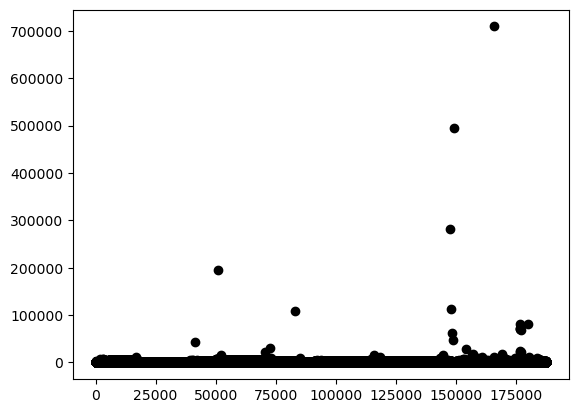

In [16]:
plt.scatter(housing.index, housing["Carpet Area"], color='black')

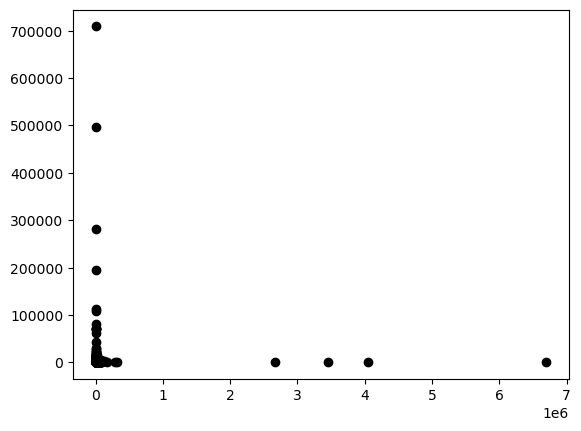

In [23]:
plt.scatter(housing["Price (in rupees)"],housing["Carpet Area"], color='black')

In [2]:
#print outliers
mean_price = housing["Carpet Area"].mean()
std_price = housing["Carpet Area"].std()


housing['Z-score2'] = (housing["Carpet Area"] - mean_price) / std_price


housing['Outlier'] = np.abs(housing['Z-score2']) > 3
housing["Carpet Area_no_outliers"] = housing["Carpet Area"].where(np.abs(housing['Z-score2']) <= 3)

outliers_ca = housing[housing['Outlier']]

print(outliers)

NameError: name 'housing' is not defined

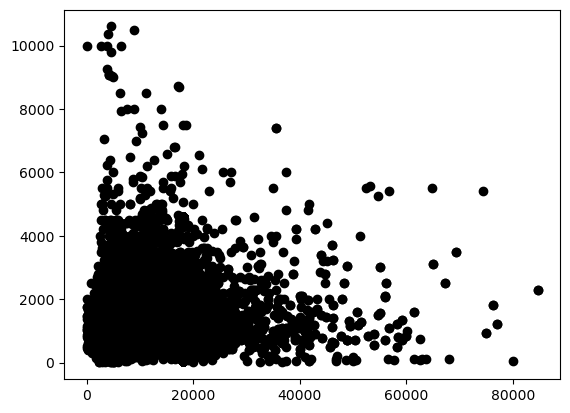

In [27]:
plt.scatter(housing["Price_no_outliers"],housing["Carpet Area_no_outliers"], color='black')

In [11]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


iso_forest = IsolationForest(contamination=0.05, random_state=42)

# 训练模型
iso_forest.fit(housing.reshape(housing["Price (in rupees)"],-1,1)

# 获取异常值分数（-1 表示异常值，1 表示正常值）
outliers = iso_forest.predict(housing["Price (in rupees)"])

# 将结果添加到数据集中
housing['outlier'] = outliers

# 显示异常值
outliers_data = housing[housing['outlier'] == -1]
print("Outliers:")
print(outliers_data)



SyntaxError: '(' was never closed (636692492.py, line 10)

In [ ]:
# 可视化
plt.scatter(data['feature1'], data['feature2'], color='blue', label='Normal Points')
plt.scatter(outliers_data['feature1'], outliers_data['feature2'], color='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [ ]:
# 可视化数据和离群值
plt.scatter(data[:, 0], data[:, 1], color='blue', label='Normal Points')
plt.scatter(outlier_points[:, 0], outlier_points[:, 1], color='red', label='Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()